In [1]:
### Read healthcare cost data from vektis https://www.vektis.nl/intelligence/open-data ###
### Please read the data description before using the data ###
import os
import json
import func
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### Unfortunately, the column names in the dataset are not easy to understand.
### Therefore, I wrote a function to replace column names

col = ["GESLACHT", "AANTAL_BSN","POSTCODE_3","AANTAL_VERZEKERDEJAREN","KOSTEN_MEDISCH_SPECIALISTISCHE_ZORG",\
       "KOSTEN_HUISARTS_INSCHRIJFTARIEF", "KOSTEN_HUISARTS_CONSULT","KOSTEN_HUISARTS_OVERIG", \
       "KOSTEN_FARMACIE", "KOSTEN_MONDZORG", "KOSTEN_ZIEKENVERVOER_ZITTEND", "KOSTEN_ZIEKENVERVOER_LIGGEND", \
       "KOSTEN_GRENSOVERSCHRIJDENDE_ZORG","KOSTEN_PARAMEDISCHE_ZORG_FYSIOTHERAPIE", \
       "KOSTEN_PARAMEDISCHE_ZORG_OVERIG","KOSTEN_OVERIG","KOSTEN_GERIATRISCHE_REVALIDATIEZORG",\
       "KOSTEN_VERPLEGING_EN_VERZORGING","KOSTEN_EERSTELIJNS_PSYCHOLOGISCHE_ZORG","KOSTEN_TWEEDELIJNS_GGZ",\
       "KOSTEN_SPECIALISTISCHE_GGZ","KOSTEN_GENERALISTISCHE_BASIS_GGZ","KOSTEN_LANGDURIGE_GGZ"]

name_col = ["SEX", "BSNs", "Postcode", "Insured_year","medical_specialist", "GP_registration",\
            "GP_consult","GP_others","pharmacy","dental","transport_seat", "transport_land",\
            "abroad","paramedical_phy","paramedical_others", "others","rehabilitation","nursing",\
            "firstLinePsy","secondLineGGZ","specialGGZ","basicGGZ","longGGZ"]

ageRange = [[0,2],[3,6],[7,10],[11,14],[15,18],[19,22],[23,26],[27,30],[31,34],[35,39],\
            [40,44],[45,50],[51,55],[56,60],[61,65],[66,70],[71,75],[76,80],[81,85],[86,90]]

ageRange_string = ['[0, 2]','[3, 6]','[7, 10]','[11, 14]','[15, 18]','[19, 22]','[23, 26]',\
                   '[27, 30]','[31, 34]','[35, 39]','[40, 44]','[45, 50]','[51, 55]','[56, 60]',\
                   '[61, 65]','[66, 70]','[71, 75]','[76, 80]','[81, 85]','[86, 90]']

postcode = 'ALL'

# Read data files and make dataframes for all age groups #

In [4]:
file_list = ['Vektis2011.csv','Vektis2012.csv','Vektis2013.csv','Vektis2014.csv',\
             'Vektis2015.csv','Vektis2016.csv','Vektis2017.csv']
df_years = {}
for file in file_list:
    fileName = file[6:-4]
    df = pd.read_csv(file,delimiter=';')
    df_years[fileName] = func.prepare(df, col, name_col, postcode)

In [5]:
years = list(df_years.keys())
categories = ['medical_specialist','GP','pharmacy','dental','transport','abroad','paramedical', \
                 'others', '1stPsy2ndGGZ', 'GGZ','rehabilitation','nursing']

df_mean_allYears = {}
for i in range(0,len(ageRange)):
    df_mean_byYear = {}
    for year in years:
        temp_df = func.merge(func.groupAgeRange(df_years[year], ageRange[i], 0))
        df_mean_byYear[str(year)] = temp_df.mean()
    df_mean_allYears[ageRange_string[i]] = df_mean_byYear

The number of insured people between 0 to 2:  4538
The number of insured people between 0 to 2:  4531
The number of insured people between 0 to 2:  4510
The number of insured people between 0 to 2:  4501
The number of insured people between 0 to 2:  4505
The number of insured people between 0 to 2:  4511
The number of insured people between 0 to 2:  4517
The number of insured people between 3 to 6:  6101
The number of insured people between 3 to 6:  6097
The number of insured people between 3 to 6:  6094
The number of insured people between 3 to 6:  6080
The number of insured people between 3 to 6:  6077
The number of insured people between 3 to 6:  6068
The number of insured people between 3 to 6:  6062
The number of insured people between 7 to 10:  6171
The number of insured people between 7 to 10:  6164
The number of insured people between 7 to 10:  6149
The number of insured people between 7 to 10:  6126
The number of insured people between 7 to 10:  6110
The number of insured peop

******

### 1. All categories in different years from the same age group (heatmap) ###

In [7]:
for elem in ageRange_string:
    avg_cost = []
    year_plt = []
    cate_plt = []
    for i in categories:
        for j in years:
            year_plt.append(j)
            cate_plt.append(i)

            if i in list(df_mean_allYears[elem][j].keys()):
                avg_cost.append(df_mean_allYears[elem][j][i])
            else:
                avg_cost.append(0)
    cost_plt = pd.DataFrame.from_records([cate_plt,year_plt,avg_cost]).transpose()
    cost_plt.columns = ['category','Year','Cost']

    sns.set()

    cost_df_pivot = cost_plt.pivot('category','Year','Cost')
    cost_df_pivot.fillna(value=np.nan, inplace=True)

    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(13, 10))
    sns.heatmap(cost_df_pivot, annot=True, fmt="0.4g",linewidths=.5, ax=ax, vmax=500,\
                   cmap=sns.cubehelix_palette(10), cbar=True)
    plt.title("Costs in different categories between 2011-2017 in age group of %s"%elem)
    plt.show()

#     filename = 'Output_Vektis/withMedSpecialist/%s_Category_Years.png'%ageRange_string[elem]
#     os.makedirs(os.path.dirname(filename), exist_ok=True)
#     plt.savefig(filename)

*****************************

### 2. All categories in the same year from different age groups (heatmap) ###

In [25]:
for elem in years:
    avg_cost = []
    ages_plt = []
    cate_plt = []
    for i in categories:
        for j in ageRange_string:
            ages_plt.append(j)
            cate_plt.append(i)

            if i in list(df_mean_allYears[j][elem].keys()):
                avg_cost.append(df_mean_allYears[j][elem][i])
            else:
                avg_cost.append(0)
    cost_plt = pd.DataFrame.from_records([cate_plt,ages_plt,avg_cost]).transpose()
    cost_plt.columns = ['category','Age range','Cost']

    sns.set()

    cost_df_pivot = cost_plt.pivot('category','Age range','Cost')
    cost_df_pivot.fillna(value=np.nan, inplace=True)

    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(13, 10))
    sns.heatmap(cost_df_pivot, annot=True, fmt="0.4g",linewidths=.5, ax=ax, vmax=500,\
                   cmap=sns.cubehelix_palette(10), cbar=True)
    plt.title("Costs in different categories from different age groups in %s"%fileName)
    plt.show()

#     filename = 'Output_Vektis/%s_Category_Change.png'%fileName
#     os.makedirs(os.path.dirname(filename), exist_ok=True)
#     plt.savefig(filename)

*************

### 3. Sum for different age groups and years ###

In [9]:
age_plt = []
year_plt = []
sum_plt = []
for i in ageRange_string:
    for j in years:
        age_plt.append(i)
        year_plt.append(j)
        sum_plt.append(df_mean_allYears[i][j].sum())

sum_cost_plt = pd.DataFrame.from_records([age_plt,year_plt,sum_plt]).transpose()
sum_cost_plt.columns = ['Age range','Year','Sum of costs']

sum_cost_plt_pivot = sum_cost_plt.pivot('Age range','Year','Sum of costs')
sum_cost_plt_pivot = sum_cost_plt_pivot.reindex(ageRange_string)
sum_cost_plt_pivot.fillna(value=np.nan, inplace=True)

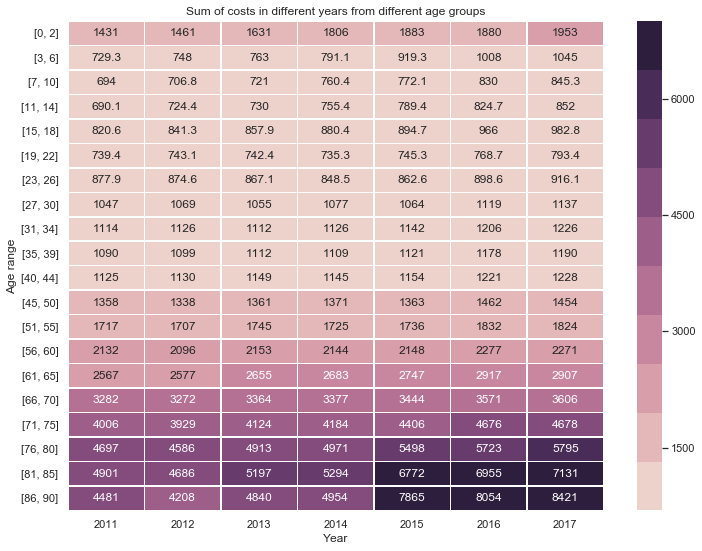

In [10]:
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(sum_cost_plt_pivot, annot=True, fmt="0.4g",linewidths=.5, ax=ax, vmax=7000,\
               cmap=sns.cubehelix_palette(10), cbar=True)
plt.title("Sum of costs in different years from different age groups")
plt.show()

# filename = 'Output_Vektis/SumVisualization/SumofCost_FULL.png'
# os.makedirs(os.path.dirname(filename), exist_ok=True)
# plt.savefig(filename)

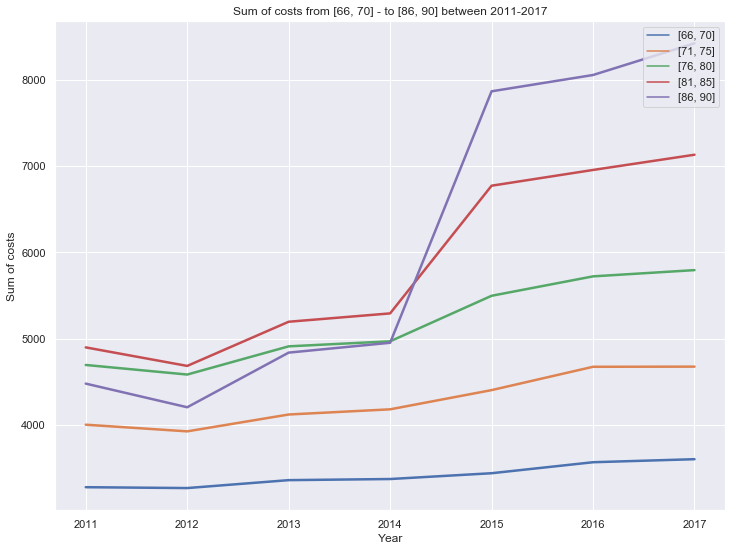

In [11]:
### Sum line plot ###
start_ageGroup = 15
end_ageGroup = 20

plt.subplots(figsize=(12, 9))
palette = sns.color_palette("muted")
p = sns.lineplot(data=sum_cost_plt_pivot[start_ageGroup:end_ageGroup].transpose(),\
                 linewidth=2.5,legend='full',dashes=False) 

filename = 'Output_Vektis/SumVisualization/from %s - to %s.png'%(ageRange_string[start_ageGroup],
                                                            ageRange_string[end_ageGroup-1])
plt.xlabel('Year')
# plt.ylim(1450,3800)
plt.ylabel('Sum of costs')
plt.title('Sum of costs from %s - to %s between 2011-2017' %(ageRange_string[start_ageGroup],
                                                            ageRange_string[end_ageGroup-1]))
plt.legend(loc='upper right')
# os.makedirs(os.path.dirname(filename), exist_ok=True)
# plt.savefig(filename)
plt.show()

### 4. Single category plot (heatmap) ###

In [13]:
one_cate = 'GP'
age_plt = []
year_plt = []
sglCat_plt = []
for i in ageRange_string:
    for j in years:
        age_plt.append(i)
        year_plt.append(j)
        if one_cate in df_mean_allYears[i][j].keys():
            sglCat_plt.append(df_mean_allYears[i][j][one_cate])
#         if '1stPsy2ndGGZ' in df_mean_allYears[i][j].keys():
#             medSpe_plt.append(df_mean_allYears[i][j]['1stPsy2ndGGZ']) # medical_specialist
#         elif 'GGZ' in df_mean_allYears[i][j].keys():
#             medSpe_plt.append(df_mean_allYears[i][j]['GGZ'])

sglCat_cost_plt = pd.DataFrame.from_records([age_plt,year_plt,sglCat_plt]).transpose()
sglCat_cost_plt.columns = ['Age range','Year','Cost from %s'%one_cate] #Medical Specialists

sglCat_cost_plt_pivot = sglCat_cost_plt.pivot('Age range','Year','Cost from %s'%one_cate) #Medical Specialists
sglCat_cost_plt_pivot = sglCat_cost_plt_pivot.reindex(ageRange_string)
sglCat_cost_plt_pivot.fillna(value=np.nan, inplace=True)

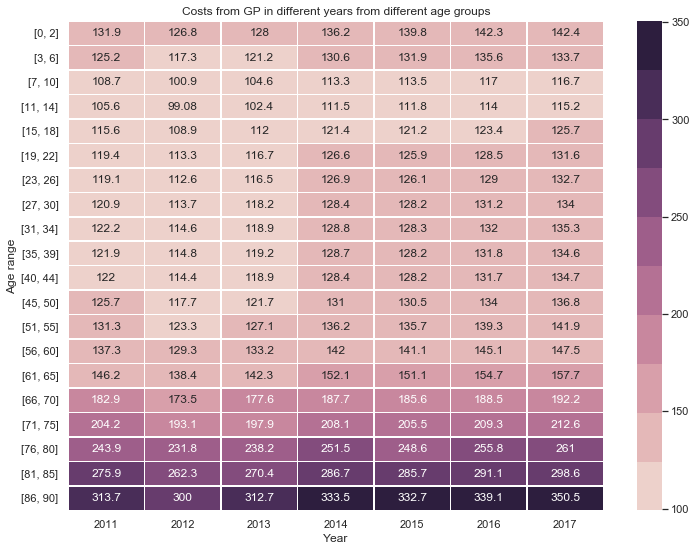

In [14]:
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(sglCat_cost_plt_pivot, annot=True, fmt="0.4g",linewidths=.5, ax=ax, \
               cmap=sns.cubehelix_palette(10), cbar=True)
plt.title("Costs from %s in different years from different age groups" %one_cate)

# filename = 'Output_Vektis/%s/%s.png' %(one_cate,one_cate)
# os.makedirs(os.path.dirname(filename), exist_ok=True)
# plt.savefig(filename)
plt.show()

### 5. Sum line plot (heatmap) ###

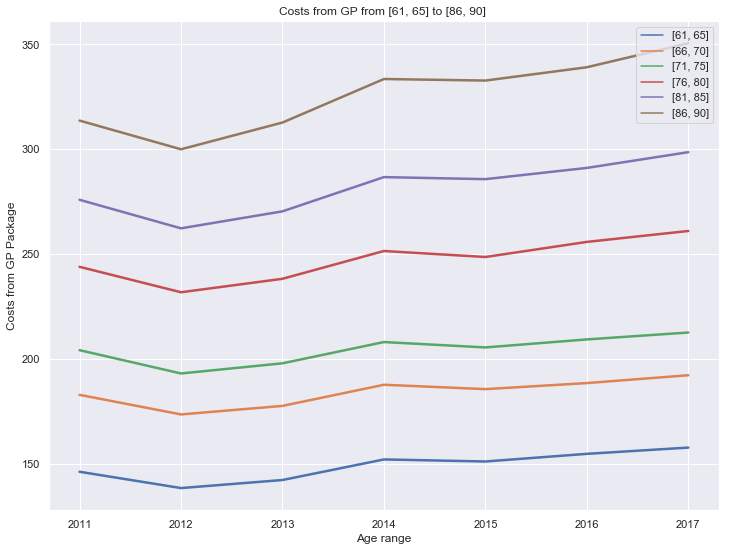

In [16]:
start_ageGroup = 14
end_ageGroup = 20

plt.subplots(figsize=(12, 9))
p = sns.lineplot(data=sglCat_cost_plt_pivot[start_ageGroup:end_ageGroup].transpose(), \
                 linewidth=2.5,legend='full',dashes=False) 
filename = 'Output_Vektis/%s/from %s to %s.png' \
%(one_cate, ageRange_string[start_ageGroup],ageRange_string[end_ageGroup-1])

# plt.ylim(35,135)
plt.legend(loc='upper right')
plt.xlabel('Age range')
plt.ylabel('Costs from %s Package' %one_cate)
plt.title('Costs from %s from %s to %s '\
          %(one_cate, ageRange_string[start_ageGroup],ageRange_string[end_ageGroup-1]))
# os.makedirs(os.path.dirname(filename), exist_ok=True)
# plt.savefig(filename)
plt.show()

**********

### 6. Line plot multiple categories ###

In [17]:
# data_plt = pd.DataFrame.from_dict(df_mean_allYears[ageGroup_string[0]]).transpose()
# data_plt_small=data_plt[['abroad','dental','others','paramedical','rehabilitation','transport']]
# data_plt_big=data_plt[['GP','pharmacy','1stPsy2ndGGZ', 'GGZ','nursing']]

# sns.set(style="whitegrid")

# plt.subplots(figsize=(8, 6))
# p=sns.lineplot(data=data_plt_small, palette="Paired", linewidth=2.5,style="choice")
# plt.legend(loc='lower left')

# plt.title("Costs in different years in the age group of %s" %ageRange_string[ageInput])
# plt.xlabel('Years')
# plt.ylabel('Costs')
# # p.set_ylim([0,75])
# plt.show()

# # filename = 'Output_Vektis/linePlot_part1_%s.png' %ageRange_string[ageInput]
# # os.makedirs(os.path.dirname(filename), exist_ok=True)
# # plt.savefig(filename)
